In [91]:
#%cd /data/yichun/nanotube_test/voltage
import numpy as np
import pandas as pd
import matplotlib

import sklearn as skl

from scipy.optimize import minimize
import seaborn as sns
from matplotlib import pyplot as plt


from matplotlib import pyplot as plt
import seaborn as sns

import plotly as ply

import tqdm
import gc
import sys
import os

import scipy as sp

import json
import copy
#%cd /data/yichun/nanotube_test/voltage/neg_1.2V
#import analysis_functions

In [161]:
%cd /data/yichun/nanotube_test/voltage/neg_0.8V_rep1/

/data/yichun/nanotube_test/voltage/neg_0.8V_rep1


In [162]:
#import analysis_functions

In [163]:
#%cd /tmp
dataDir='all_ions.dat'
#dataFiles=[filename for filename in os.listdir(dataDir) if "dat" in filename]
#dataFiles[0]


In [164]:
#datColNames=['Frame','Rst00_X','Rst00_Y','Rst00_Z','x','y','z']
tmp=pd.read_csv(dataDir,delim_whitespace=True)
tmp

,Frame,MEASUREMENT,X,Y,Z
0,0,Vec_00000,16.822798,-13.221012,-24.456692
1,1,Vec_00000,18.040865,-14.525939,-26.389721
2,2,Vec_00000,-18.342392,-17.805326,-26.991169
3,3,Vec_00000,-16.241856,-13.965283,-28.021421
4,4,Vec_00000,-15.731520,-12.753565,-30.948359
...,...,...,...,...,...
599995,49995,Vec_00011,-4.770507,3.143265,-12.395583
599996,49996,Vec_00011,-6.219466,2.362140,-12.224135
599997,49997,Vec_00011,-4.612754,3.415088,-12.973971
599998,49998,Vec_00011,-4.254279,0.685670,-11.584853


/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


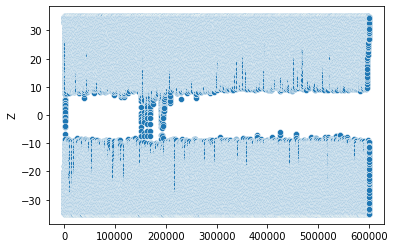

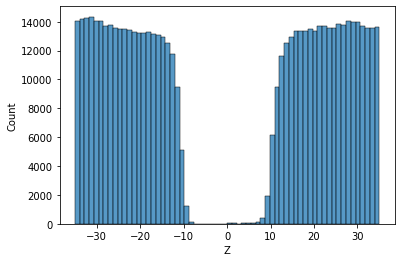

In [165]:
sns.scatterplot(tmp.index,tmp.Z)
plt.show()
sns.histplot(data=tmp.Z)
plt.show()

In [166]:
rawZ=[]
rawZ=tmp

Up=6  # boundary of 1st and last milestones
Lo=-6.0


conditions=[
    (rawZ['Z']>=Lo)& (rawZ['Z']<=Up),(rawZ['Z']<Lo),(rawZ['Z']>Up)
]
choices=[0,-1,1]
rawZ['Zindex']=np.select(conditions,choices)
rawZ
print(rawZ.query('Zindex==0'))

        Frame MEASUREMENT         X         Y         Z  Zindex
1160     1160   Vec_00000  1.575170  0.035471  5.870933       0
1161     1161   Vec_00000  1.506509  0.374159  5.201217       0
1162     1162   Vec_00000  0.205545 -1.207950  5.437270       0
1163     1163   Vec_00000 -0.342127 -0.311741  3.783553       0
1164     1164   Vec_00000  0.929109 -0.483221  4.378806       0
...       ...         ...       ...       ...       ...     ...
208035   8035   Vec_00004 -0.080729  0.379828  4.195714       0
208036   8036   Vec_00004 -0.470450  0.908348  5.937521       0
208043   8043   Vec_00004 -0.185263 -0.587618  5.551564       0
208044   8044   Vec_00004 -0.387064 -0.528738  5.027921       0
230497  30497   Vec_00004 -0.597684 -0.937044  5.663527       0

[218 rows x 6 columns]


/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


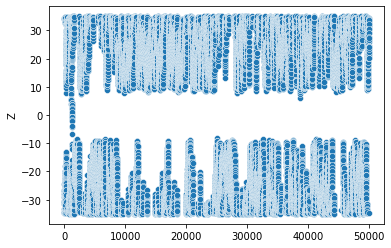

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


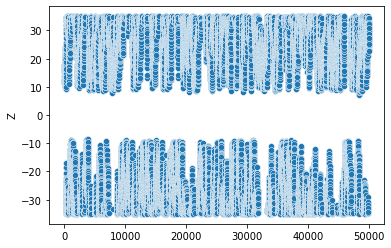

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


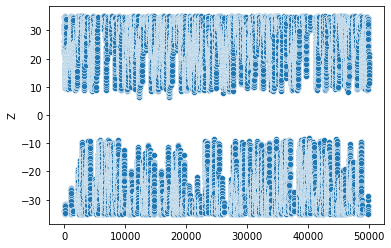

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


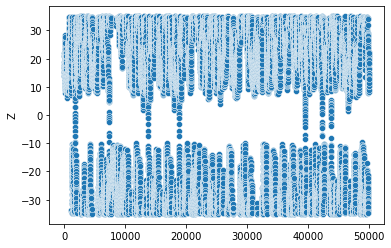

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


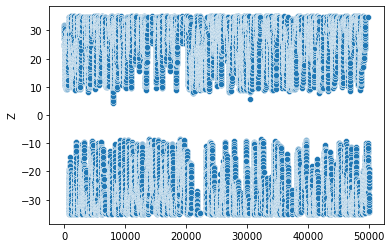

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


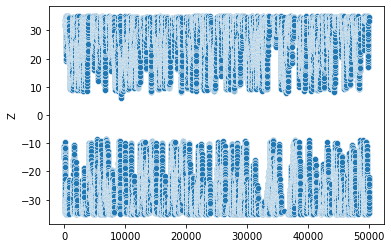

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


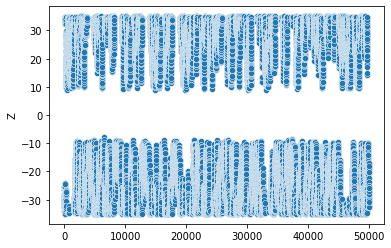

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


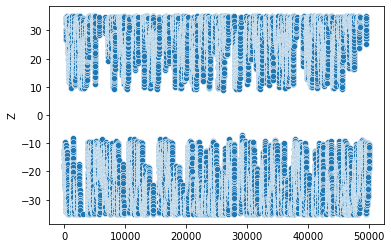

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


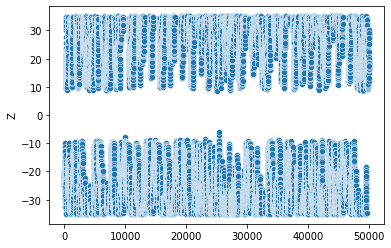

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


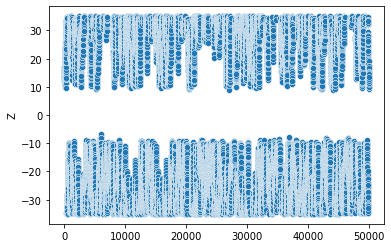

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


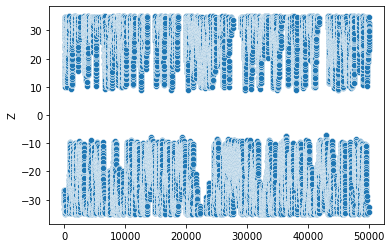

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


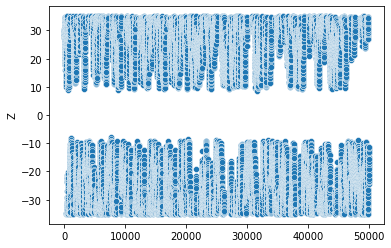

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


[      Frame MEASUREMENT          X         Y          Z  Zindex  change
0        10   Vec_00000 -13.761360 -7.895650  34.478428       1       1
1        11   Vec_00000 -11.969316 -6.443720 -33.395763      -1       1
2        13   Vec_00000 -10.413197 -3.206315  34.002846       1       1
3        15   Vec_00000 -11.759428 -2.617907 -34.803032      -1       1
4        20   Vec_00000 -10.360193 -3.919027  34.392693       1       1
...     ...         ...        ...       ...        ...     ...     ...
1195  49653   Vec_00000  -1.288271 -2.133970  34.714546       1       1
1196  49654   Vec_00000  -1.708482  1.159810 -34.585918      -1       1
1197  49658   Vec_00000  -9.398985 -0.481790  33.856903       1       1
1198  49958   Vec_00000   4.237104  6.180552 -34.566879      -1       1
1199  49959   Vec_00000   2.191894  4.592073  34.198154       1       1

[1200 rows x 7 columns],       Frame MEASUREMENT          X          Y          Z  Zindex  change
0       269   Vec_00001 -15.714525  

In [167]:
# assign change value 1 if Zindex is different between two consecutive steps
# then save change==1 rows to transDataTables

rawZ['change']=0
potData=[]
transData=[]
transDataTable=[]
for potVal, potData in rawZ.groupby('MEASUREMENT'):
    #print(potVal)
    #print(len(potData))
    potData=potData.reset_index(drop=True)
    sns.scatterplot(potData.index,potData.Z)
    plt.show()
    #print(potData.head())
    for i in np.arange(1,len(potData)):
        potData['change'][i]=1.0*(np.abs(potData['Zindex'][i]-potData['Zindex'][i-1])>0)   
    transData=potData.query('change==1').reset_index(drop=True)
    #transDataTable.append(copy.deepcopy(transData))
    transDataTable.append((transData))

transDataTables=pd.concat(transDataTable,names=None)
print(transDataTable)
    


In [168]:
potVal=[]
potData=[]
transDataTables['trans']=0
waitData=[]
waitDataTable=[]
waitDataTables=[]
for potVal, potData in transDataTables.groupby('MEASUREMENT'):
    #print(potVal)
    #print(len(potData))
    #potData=potData.reset_index(drop=True)
    #print(potData.head())
    for i in np.arange(0,len(potData)-2):
        if (potData.Zindex[i]==1) & (potData.Zindex[i+1]==0) & (potData.Zindex[i+2]==-1):
            potData['trans'][i]=1
        elif (potData.Zindex[i]==-1) & (potData.Zindex[i+1]==0) & (potData.Zindex[i+2]==1):
            potData['trans'][i]=-1
        else:
            potData['trans'][i]=0
    waitData=potData.query('trans!=0').reset_index(drop=True)
    #waitDataTable.append(copy.deepcopy(waitData))
    waitDataTable.append(waitData)

waitDataTables=pd.concat(waitDataTable, names=None)
print(waitDataTables)
print('number of positive transition from inside to outside', len(waitDataTables.query('trans==-1')),"Cl")
print('number of negative transition from outside to inside', len(waitDataTables.query('trans==1')),"K")
print('total number of transition', len(waitDataTables))
        
    

/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/cm/shared/apps/jupyter/11.0.0/lib/python3.7/site

   Frame MEASUREMENT          X          Y          Z  Zindex  change  trans
0   1066   Vec_00000  11.512640  16.085663  34.339005       1       1      1
0   1796   Vec_00003  -0.186252  -0.303874   6.227156       1       1      1
1   7269   Vec_00003   0.212501  -0.667357   6.871227       1       1      1
2  13765   Vec_00003   1.389310   1.121874   6.939918       1       1      1
3  18765   Vec_00003   1.389310   1.121874   6.939918       1       1      1
4  39492   Vec_00003   0.952823  -1.035804   6.599446       1       1      1
5  41914   Vec_00003   4.987844  -1.276802  33.565754       1       1      1
6  43702   Vec_00003   2.646835   3.623971  33.745224       1       1      1
number of positive transition from inside to outside 0 Cl
number of negative transition from outside to inside 8 K
total number of transition 8


# code below is to compute the time between each successful transition

In [156]:
import copy

In [157]:
potVal=[]
potData=[]
tot_count=0
waitTimeTable=[]
waitTime=np.zeros(len(waitDataTables))

for potVal, potData in waitDataTables.groupby('MEASUREMENT'):
    if (len(potData)>1):
        print(potVal, len(potData))
        
        for i in np.arange(0,len(potData)-1):
                num=1
                tot_count=num+tot_count
                waitTime[i]=potData.Frame[i+1]-potData.Frame[i] 
                print(i, waitTime[i])
    waitTimeTable.append(copy.deepcopy(waitTime[i]))
    
    
print("waitTimeTable", waitTimeTable)
totalTime=np.sum(waitTimeTable)
print("total time", totalTime)
print('average time', np.mean(waitTimeTable))
print('tot_count',tot_count)




IndexError: index 26998 is out of bounds for axis 0 with size 1

# The code below is to calculate the confidence interval over lamba based on exponential distribution: 

$$\frac{2n}{\hat{\lambda}\chi^{2}_{1-\alpha / 2,2n}} < \frac{1}{\lambda} < \frac{2n}{\hat{\lambda}\chi^{2}_{\alpha / 2,2n}}$$

ref: https://en.wikipedia.org/wiki/Exponential_distribution#Bayesian_inference


/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/cm/local/apps/python37/lib/python3.7/site-packages/seaborn/distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/cm/local/apps/python37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/cm/local/apps/python37/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


ValueError: zero-size array to reduction operation maximum which has no identity

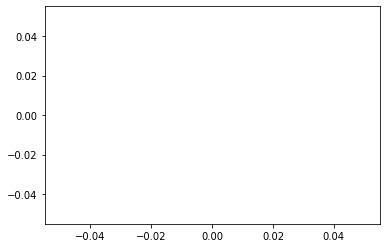

In [158]:
def exp_fun(x,lbda):
  return(lbda*np.exp(-lbda*x))

#note: we want to find model function arguments (Args) that
#optimize the residual sum(y-modelFun(x,Args))
def get_residual_function(modelFun,x,y):
  return(lambda args: np.sum((y-modelFun(x,*args))**2))

tempdata=waitTimeTable
sns.distplot(tempdata)
xvals=np.linspace(0,np.max(tempdata)*1.5,101)
histData=np.histogram(tempdata) #returns (counts, locations)
nzInds=np.nonzero(histData[0]) #need to ignore bins with no count

sampleLocs=(histData[1][1:]+histData[1][:-1])[nzInds]/2.
sampleCounts=histData[0][nzInds]
print("raw mean", np.mean(tempdata))
naiveFit_lambda=(np.sum(sampleCounts*sampleLocs/np.sum(sampleCounts)))**-1
print("naive_mean", naiveFit_lambda**-1)

confidenceLevel=.75
alpha=1-confidenceLevel
chiRight=sp.stats.chi2.ppf(alpha/2.,2*len(sampleLocs))
print("chiRight", chiRight)
chiLeft=sp.stats.chi2.ppf(1-alpha/2.,2*len(sampleLocs))
lambdaMax=(2*len(sampleLocs)*(naiveFit_lambda**-1)/(chiLeft))**-1
lambdaMin=(2*len(sampleLocs)*(naiveFit_lambda**-1)/(chiRight))**-1
print('MLE lambda = %f (MLE mean = %f)'%(
    naiveFit_lambda,naiveFit_lambda**-1))
print('Lambda C.I. (%.2f confidence) = [%f,%f] (mean CI = [%f,%f]'%(
    confidenceLevel,
    lambdaMin,lambdaMax,
    lambdaMax**-1,lambdaMin**-1))

sns.lineplot(xvals,
             exp_fun(xvals,naiveFit_lambda),
             label='MLE')
errDat=np.array(list(zip(
    exp_fun(xvals,lambdaMax),
    exp_fun(xvals,naiveFit_lambda),
    exp_fun(xvals,lambdaMin))))
errMax=np.max(errDat,axis=1)
errMin=np.min(errDat,axis=1)

sns.lineplot(xvals,errMax,color='r',label='%.2f CI bounds'%confidenceLevel)
sns.lineplot(xvals,errMin,color='r')
plt.fill_between(xvals,errMax,errMin,
                 color='grey',alpha=.25,
                 label='%.2f CI ribbon'%confidenceLevel)
sns.rugplot(tempdata,color='black',label='observed intervals')
plt.xlabel('Interval Length (ns)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()